In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

redacted_df1 = pd.read_csv('redacted-Results-Oct20-Mar21.csv')
redacted_df2 = pd.read_csv('redacted-Results-April21-Sept21.csv')

### Analysis of 'redacted-Results-Oct20-Mar21.csv'

In [287]:
print(redacted_df1.shape)
print(redacted_df1.columns.to_list(), '\n')
print(redacted_df1.dtypes)

redacted_df1.head()

(755, 21)
['id', 'notes', 'original_zip', 'manual_ zip ', 'match_kind', 'state_code', 'county_code', 'tract_code', 'block_code', 'RRF Award Amount ', 'No of months of assistance', 'Rent owing', 'RRF Award Type ', 'Mthly Self Employment', 'Mthly Unemployment', 'Mthly Interest or Dividend', 'Mthly Pension or Retirement', 'Mthly TANF/Public Assistance', 'Mthly Alimony income', 'Mthly Armed Forces income', 'Mthly Other income'] 

id                                int64
notes                            object
original_zip                     object
manual_ zip                     float64
match_kind                       object
state_code                        int64
county_code                       int64
tract_code                      float64
block_code                      float64
RRF Award Amount                 object
No of months of assistance       object
Rent owing                      float64
RRF Award Type                   object
Mthly Self Employment           float64
Mthly Unem

,id,notes,original_zip,manual_ zip,match_kind,state_code,county_code,tract_code,block_code,RRF Award Amount,...,Rent owing,RRF Award Type,Mthly Self Employment,Mthly Unemployment,Mthly Interest or Dividend,Mthly Pension or Retirement,Mthly TANF/Public Assistance,Mthly Alimony income,Mthly Armed Forces income,Mthly Other income
0,7,NaN,2119,NaN,Exact,25,25,81400.0,3003.0,6000,...,9444.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,NaN,2124,NaN,Exact,25,25,100300.0,3005.0,5700,...,1900.0,Arrears & Future payments,NaN,2140.0,NaN,NaN,NaN,NaN,NaN,NaN
2,56,NaN,2119,NaN,Exact,25,25,80100.0,1051.0,3750,...,4375.0,Arrears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,63,NaN,2128,NaN,Exact,25,25,51200.0,3000.0,4000,...,4000.0,Arrears & Future payments,NaN,NaN,NaN,NaN,NaN,530.0,NaN,NaN
4,75,NaN,2128,NaN,Exact,25,25,50101.0,3001.0,6000,...,7900.0,Arrears,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


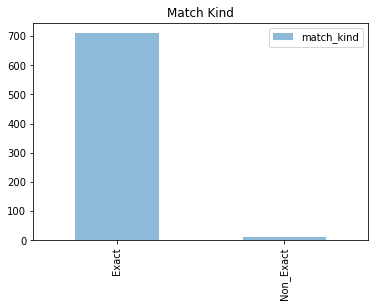

In [213]:
redacted_df1['match_kind'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Match Kind")
plt.show()

<ipython-input-214-e4fd5b9d6804>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redacted_df1['RRF Award Amount '][744] = float(1875)


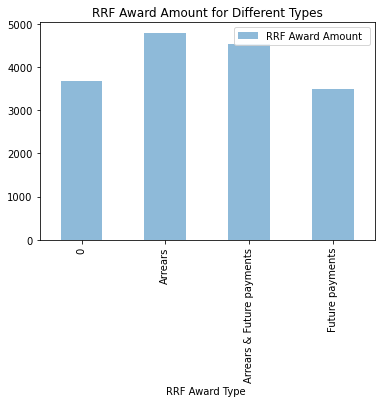

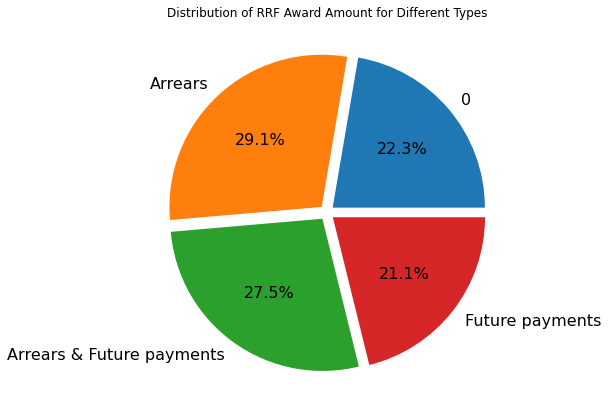

In [214]:
redacted_df1 = redacted_df1.fillna(0)
redacted_df1['RRF Award Amount '][744] = float(1875)
redacted_df1['RRF Award Amount '] = redacted_df1['RRF Award Amount '].astype(float)

temp = redacted_df1[['RRF Award Amount ', 'RRF Award Type ']].groupby('RRF Award Type ').mean()
temp.plot(kind='bar', legend=True, alpha=.5)
plt.title("RRF Award Amount for Different Types")
plt.show()

print('\n\n')

plt.figure(figsize=(7,7))
plt.pie(temp['RRF Award Amount '], labels = temp.index.to_list(), explode = [0.05, 0.05, 0.05, 0.05] ,autopct = '%1.1f%%' ,textprops = {'fontsize' : 16 })
plt.title("Distribution of RRF Award Amount for Different Types")
plt.show() 

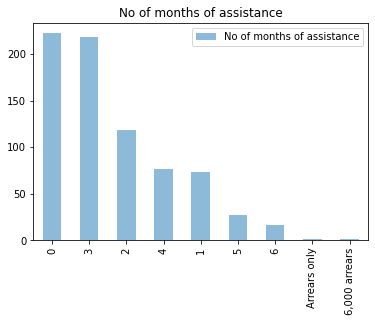

In [215]:
redacted_df1['No of months of assistance'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("No of months of assistance")
plt.show()

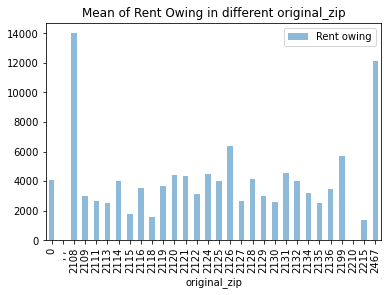

In [216]:
redacted_df1[['original_zip', 'Rent owing']].groupby('original_zip').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of Rent Owing in different original_zip")
plt.show()

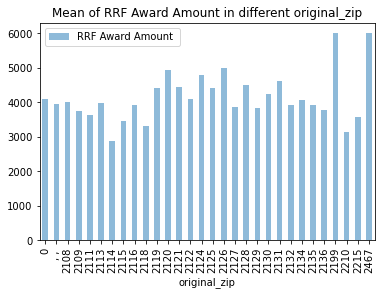

In [217]:
redacted_df1[['RRF Award Amount ', 'original_zip']].groupby('original_zip').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of RRF Award Amount in different original_zip")
plt.show()

Text(0.5, 1.0, 'Rent owing vs RRF Award Amount ')

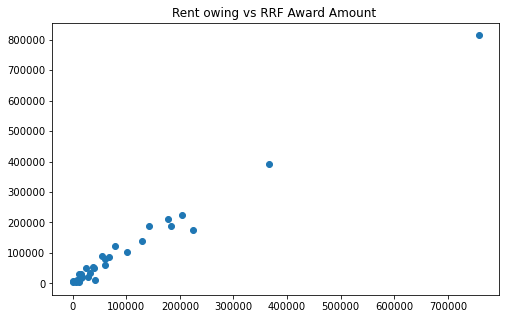

In [281]:
temp1 = redacted_df1.groupby('original_zip')['Rent owing'].sum().reset_index(name="Rent owing sum")
temp2 = redacted_df1.groupby('original_zip')['RRF Award Amount '].sum().reset_index(name="RRF Award Amount sum")
temp = temp1.merge(temp2)

plt.figure(figsize=(8,5))
plt.scatter(temp['Rent owing sum'],temp['RRF Award Amount sum'])
plt.title('Rent owing vs RRF Award Amount ')

<ipython-input-283-4a019587965a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ratio'] = temp_df['RRF Award Amount sum'] /temp_df['Rent owing sum']


Text(0.5, 1.0, 'Rent owing vs RRF Award Amount in different original_zip')

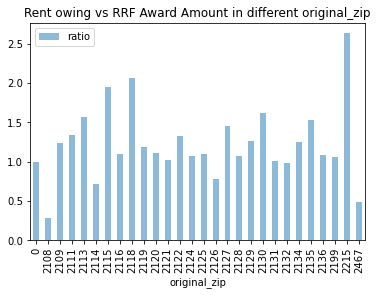

In [283]:
temp_df = temp.loc[temp['Rent owing sum']!=0]
temp_df['ratio'] = temp_df['RRF Award Amount sum'] /temp_df['Rent owing sum']

temp_df[['ratio', 'original_zip']].groupby('original_zip').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title('Rent owing vs RRF Award Amount in different original_zip')

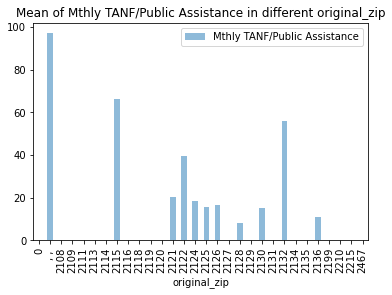

In [277]:
redacted_df1[['Mthly TANF/Public Assistance', 'original_zip']].groupby('original_zip').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of Mthly TANF/Public Assistance in different original_zip")
plt.show()

### Analysis of 'redacted-Results-April21-Sept21.csv'

In [430]:
from re import sub
from decimal import Decimal

redacted_df2 = pd.read_csv('redacted-Results-April21-Sept21.csv')
print(redacted_df2.shape)
print(redacted_df2.columns.to_list(), '\n')
print(redacted_df2.dtypes)

temp = redacted_df2[~redacted_df2['Rental Relief Fund: Total Monthly Income all sources'].str.contains(r'\d+')]
redacted_df2.loc[~redacted_df2['Rental Relief Fund: Total Monthly Income all sources'].str.contains(r'\d+'), 'Rental Relief Fund: Total Monthly Income all sources'] = '0'

temp = redacted_df2[~redacted_df2['Rental Relief Gap'].str.contains(r'\d+')]
redacted_df2.loc[~redacted_df2['Rental Relief Gap'].str.contains(r'\d+'), 'Rental Relief Gap'] = '0'

redacted_df2['Total RRF Award'] = redacted_df2['Total RRF Award'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)
redacted_df2['Rental Relief Fund: How much rent do you owe due to COVID-19'] = redacted_df2['Rental Relief Fund: How much rent do you owe due to COVID-19'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)
redacted_df2['Rental Relief Fund: How much do you owe on utilities listed?'] = redacted_df2['Rental Relief Fund: How much do you owe on utilities listed?'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)
redacted_df2['Rental Relief Fund: Total Monthly Income all sources'] = redacted_df2['Rental Relief Fund: Total Monthly Income all sources'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)
redacted_df2['Rental Relief Gap'] = redacted_df2['Rental Relief Gap'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)
redacted_df2['Utility Payments - Amount obtained ($)'] = redacted_df2['Utility Payments - Amount obtained ($)'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)
redacted_df2['Future Stipend - Amount obtained ($)'] = redacted_df2['Future Stipend - Amount obtained ($)'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)
redacted_df2['Rental Arrears - Amount obtained ($)'] = redacted_df2['Rental Arrears - Amount obtained ($)'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)
redacted_df2['Moving Costs - Amount obtained ($)'] = redacted_df2['Moving Costs - Amount obtained ($)'].fillna('0').apply(lambda x: Decimal(sub(r'[^\d.]', '', x))).astype(float)

redacted_df2

(1413, 21)
['id', 'notes', 'original_zip', 'manual_match_zip', 'match', 'match_kind', 'state_code', 'county_code', 'tract_code', 'block_code', 'Rental Relief Fund: How much rent do you owe due to COVID-19', 'Rental Relief Fund: How much do you owe on utilities listed?', 'Rental Relief Fund: Total Monthly Income all sources', 'Rental Relief Gap', 'Months of Assistance Awarded', 'Date of Final Decision', 'Utility Payments - Amount obtained ($)', 'Future Stipend - Amount obtained ($)', 'Rental Arrears - Amount obtained ($)', 'Moving Costs - Amount obtained ($)', 'Total RRF Award'] 

id                                                                int64
notes                                                            object
original_zip                                                    float64
manual_match_zip                                                 object
match                                                            object
match_kind                                           

,id,notes,original_zip,manual_match_zip,match,match_kind,state_code,county_code,tract_code,block_code,...,Rental Relief Fund: How much do you owe on utilities listed?,Rental Relief Fund: Total Monthly Income all sources,Rental Relief Gap,Months of Assistance Awarded,Date of Final Decision,Utility Payments - Amount obtained ($),Future Stipend - Amount obtained ($),Rental Arrears - Amount obtained ($),Moving Costs - Amount obtained ($),Total RRF Award
0,161733,NaN,2121.0,NaN,Match,Non_Exact,25.0,25.0,10802.0,2001.0,...,0.00,0.00,0.00,July-21; August-21; September-21; October-21; ...,NaN,197.88,6000.0,2000.00,0.0,8197.88
1,161811,NaN,2124.0,NaN,Match,Non_Exact,25.0,25.0,701.0,3010.0,...,299.11,1203.00,3499.11,21-Apr,4/7/21,0.00,0.0,3200.00,0.0,3200.00
2,161824,NaN,2126.0,NaN,Match,Non_Exact,25.0,25.0,92400.0,4001.0,...,1724.21,794.00,1724.21,NaN,NaN,1500.00,0.0,0.00,0.0,1500.00
3,161837,NaN,2128.0,NaN,Match,Non_Exact,25.0,25.0,10802.0,2003.0,...,0.00,1000.00,30600.00,May-21; June-21; July-21; August-21; September-21,NaN,0.00,0.0,15000.00,0.0,15000.00
4,161839,NaN,NaN,2128,No_Match,NaN,NaN,NaN,50700.0,1001.0,...,0.00,1192.00,1501.00,September-21; October-21; November-21,8/17/21,0.00,4500.0,1501.00,0.0,6001.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,169344,NaN,2128.0,NaN,Match,Exact,25.0,25.0,50700.0,3000.0,...,410.00,1074.00,1849.00,September-21; October-21; November-21; Decembe...,NaN,410.00,4317.0,4317.00,0.0,9044.00
1409,169757,NaN,2136.0,NaN,Match,Exact,25.0,25.0,140107.0,1005.0,...,538.00,3866.28,538.00,September-20; October-20,NaN,538.01,0.0,0.00,0.0,538.01
1410,169786,NaN,2121.0,NaN,Match,Non_Exact,25.0,25.0,100300.0,3008.0,...,0.00,0.00,0.00,October-21; November-21; December-21; January-...,NaN,0.00,1098.0,0.00,0.0,1098.00
1411,169864,NaN,2120.0,NaN,Match,Exact,25.0,25.0,80801.0,2005.0,...,16975.00,1223.00,18415.00,21-Oct,NaN,2000.00,0.0,0.00,0.0,2000.00


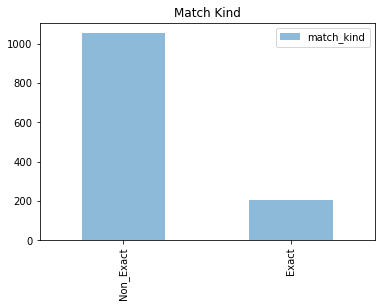

In [431]:
redacted_df2['match_kind'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Match Kind")
plt.show()

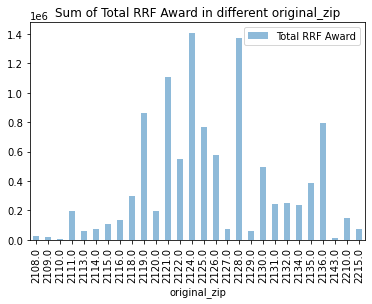

In [477]:
redacted_df2[['Total RRF Award', 'original_zip']].groupby('original_zip').sum().plot(kind='bar', legend=True, alpha=.5)
plt.title("Sum of Total RRF Award in different original_zip")
plt.show()

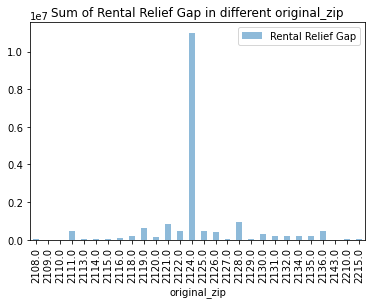

In [478]:
redacted_df2[['Rental Relief Gap', 'original_zip']].groupby('original_zip').sum().plot(kind='bar', legend=True, alpha=.5)
plt.title("Sum of Rental Relief Gap in different original_zip")
plt.show()

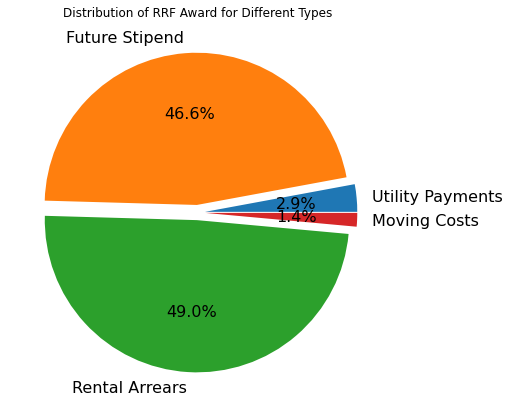

In [442]:
x = ['Utility Payments', 'Future Stipend', 'Rental Arrears', 'Moving Costs']
y = []
for i in x:
    y.append(redacted_df2[f'{i} - Amount obtained ($)'].sum())

plt.figure(figsize=(7,7))
plt.pie(y, labels = x, explode = [0.05, 0.05, 0.05, 0.05] ,autopct = '%1.1f%%' ,textprops = {'fontsize' : 16 })
plt.title("Distribution of RRF Award for Different Types")
plt.show() 

,original_zip,Rental Relief Gap sum,Total RRF Award sum,difference
0,2108.0,19818.52,25700.00,5881.48
1,2109.0,6200.00,18924.19,12724.19
2,2110.0,1168.00,5840.00,4672.00
3,2111.0,460484.13,192829.84,-267654.29
4,2113.0,50043.61,61769.82,11726.21
5,2114.0,61576.93,72361.32,10784.39
6,2115.0,53935.11,107720.24,53785.13
7,2116.0,75102.79,132748.26,57645.47
8,2118.0,201921.09,300921.24,99000.15
9,2119.0,613196.83,861698.49,248501.66


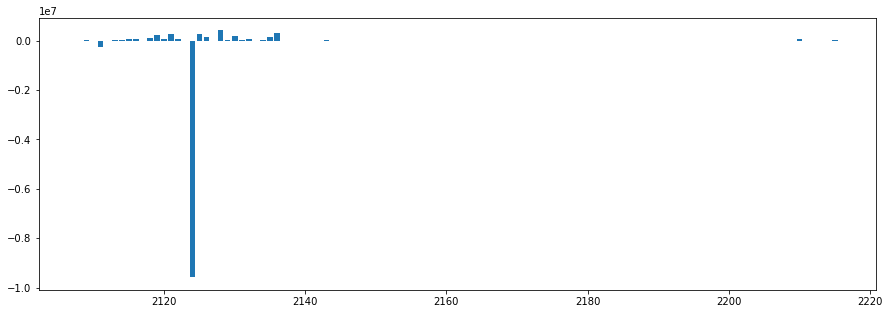

In [507]:
temp1 = redacted_df2.groupby('original_zip')['Rental Relief Gap'].sum().reset_index(name="Rental Relief Gap sum")
temp2 = redacted_df2.groupby('original_zip')['Total RRF Award'].sum().reset_index(name="Total RRF Award sum")
temp = temp1.merge(temp2)
temp['difference'] = temp['Total RRF Award sum'] - temp['Rental Relief Gap sum']

plt.figure(figsize=(15,5))
plt.bar(temp['original_zip'], temp['difference'])
temp

,original_zip,Rental Relief Gap sum,Total RRF Award sum,difference
0,2108.0,19818.52,25700.00,5881.480000
1,2109.0,6200.00,18924.19,12724.190000
2,2110.0,1168.00,5840.00,4672.000000
3,2111.0,460484.13,192829.84,-267654.290000
4,2113.0,50043.61,61769.82,11726.210000
5,2114.0,61576.93,72361.32,10784.390000
6,2115.0,53935.11,107720.24,53785.130000
7,2116.0,75102.79,132748.26,57645.470000
8,2118.0,201921.09,300921.24,99000.150000
9,2119.0,613196.83,861698.49,248501.660000


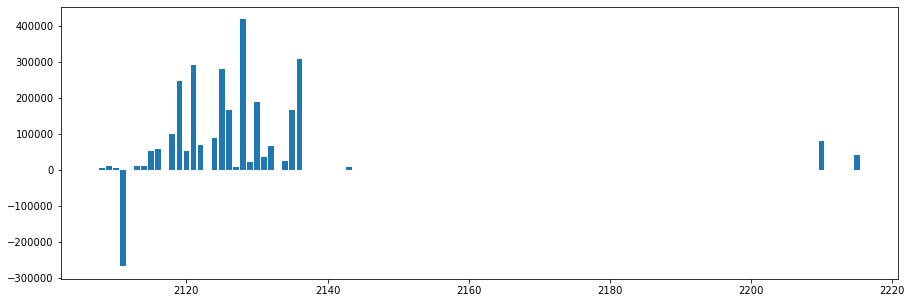

In [508]:
temp['difference'].nsmallest(1)
temp['difference'][13] = 0
temp['difference'][13] = temp['difference'].mean()

plt.figure(figsize=(15,5))
plt.bar(temp['original_zip'], temp['difference'])
temp

<ipython-input-510-77c4b72c6c68>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['ratio'] = temp_df['Total RRF Award sum'] /temp_df['Rental Relief Gap sum']


Text(0.5, 1.0, 'Rent owing vs Total RRF Award in different original_zip')

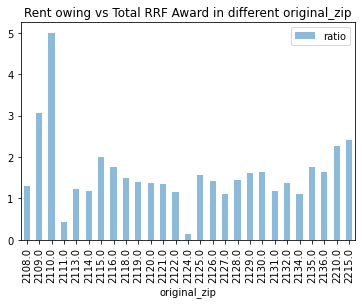

In [510]:
temp_df = temp.loc[temp['Rental Relief Gap sum']!=0]
temp_df['ratio'] = temp_df['Total RRF Award sum'] /temp_df['Rental Relief Gap sum']

temp_df[['ratio', 'original_zip']].groupby('original_zip').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title('Rent owing vs Total RRF Award in different original_zip')

In [511]:
redacted_df2.columns
#redacted_df2.dtypes

Index(['id', 'notes', 'original_zip', 'manual_match_zip', 'match',
       'match_kind', 'state_code', 'county_code', 'tract_code', 'block_code',
       'Rental Relief Fund: How much rent do you owe due to COVID-19',
       'Rental Relief Fund: How much do you owe on utilities listed?',
       'Rental Relief Fund: Total Monthly Income all sources',
       'Rental Relief Gap', 'Months of Assistance Awarded',
       'Date of Final Decision', 'Utility Payments - Amount obtained ($)',
       'Future Stipend - Amount obtained ($)',
       'Rental Arrears - Amount obtained ($)',
       'Moving Costs - Amount obtained ($)', 'Total RRF Award'],
      dtype='object')

In [514]:
redacted_df2[['Months of Assistance Awarded', 'original_zip']].value_counts()

Months of Assistance Awarded                                                                                 original_zip
21-May                                                                                                       2124.0          12
21-Apr                                                                                                       2128.0          10
                                                                                                             2124.0          10
April-21; May-21; June-21; July-21                                                                           2128.0           9
21-May                                                                                                       2119.0           9
                                                                                                                             ..
February-21; March-21; April-21; May-21; June-21; July-21; August-21; September-21; October-21               2